In [2]:
#from sklearn.manifold import TSNE
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import utils
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from random import randrange
from sklearn.metrics import plot_confusion_matrix
import sys; sys.path.append('../')
#from fast_tsne import fast_tsne
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from msp_tsne import MultiscaleParametricTSNE

In [3]:
# Fashion MNIST reader
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('data\\', kind='train')
X_test, y_test = load_mnist('data\\', kind='t10k')

In [5]:
from sklearn.preprocessing import QuantileTransformer

pipe = Pipeline([
        ('scaler', QuantileTransformer()),
        ('msp_tsne', (MultiscaleParametricTSNE(n_components=2,
                                               n_iter=150,
                                               verbose=1)))
    ])

In [6]:
time_start = time.time()
pca_50 = PCA(n_components=10)
embedding_train = pca_50.fit_transform(X_train)
print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 2.595978260040283 seconds
Cumulative variance explained by 50 principal components: 0.7199082699433924


In [7]:
time_start = time.time()
pca_50 = PCA(n_components=10)
embedding_test = pca_50.fit_transform(X_test)
print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 0.3747994899749756 seconds
Cumulative variance explained by 50 principal components: 0.7194441619507598


In [7]:
    # Fit
    X_tr_2d = pipe.fit_transform(embedding_train)

Building model.. Done
Start training..


100%|██████████| 15/15 [03:04<00:00, 12.31s/it]


Epoch: 0 - Loss: 7.928
Epoch: 10 - Loss: 7.478
Epoch: 20 - Loss: 7.451
Epoch: 30 - Loss: 7.439
Epoch: 40 - Loss: 7.430
Epoch: 50 - Loss: 0.468
Epoch: 60 - Loss: 0.465
Epoch: 70 - Loss: 0.465
Epoch: 80 - Loss: 0.466
Epoch: 90 - Loss: 0.464
Epoch: 100 - Loss: 0.463
Epoch: 110 - Loss: 0.461
Epoch: 120 - Loss: 0.461
Epoch: 130 - Loss: 0.459
Epoch: 140 - Loss: 0.457
Done
Predicting embedding points.. Done


In [8]:
  # Transform
X_ts_2d = pipe.transform(embedding_test)

Predicting embedding points.. Done


In [10]:
label= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
board = []
for i in range(10):
    board.append([])
    for j in range(2):
        board[i].append(0)

def fashion_scatter(x, colors, word = False):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = plt.scatter(x[:,0], x[:,1], lw=0, s=80, c=palette[colors.astype(np.int)],facecolors='none', edgecolors='r')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        #xtext, ytext= np.median(x[colors == i, :], axis=0)
        xtext, ytext= np.median(x[colors == i, :], axis=0)
        if (word):
            txt = ax.text(xtext, ytext, label[i], fontsize=24)
        else:
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        board[i][0] = xtext
        board[i][1] = ytext

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-5.43332, -0.30255505, '0'),
  Text(6.4188538, 0.048909523, '1'),
  Text(0.30253097, 4.6217885, '2'),
  Text(-5.864877, 4.221846, '3'),
  Text(1.7325894, 3.1238065, '4'),
  Text(-2.0289347, -4.961483, '5'),
  Text(-0.7144233, 1.8813077, '6'),
  Text(-6.219634, -5.7716684, '7'),
  Text(0.9678747, -2.2704105, '8'),
  Text(1.7642922, -7.2842917, '9')])

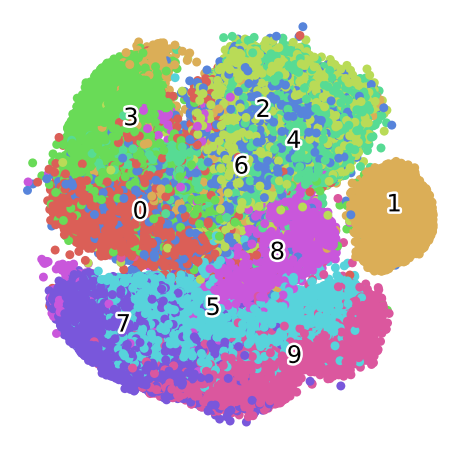

In [11]:
fashion_scatter(X_tr_2d,y_train)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13, metric="euclidean")
classifier.fit(X_tr_2d, y_train)
y_pred = classifier.predict(X_ts_2d)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[866   4  19  23  12  17  39   1  17   2]
 [ 17 885  20  26  24   1  15   0   8   4]
 [ 48  14 583  29  70  83  45   0  69  59]
 [ 89  22  53 721  39   4  46   0  15  11]
 [ 27  28 119  75 537  48  40   0  88  38]
 [ 27   1   9   2  11 782  12  97  21  38]
 [140  14  85  62  64  68 472   0  67  28]
 [  0   0   2   0   0  97   1 869   8  23]
 [  5   1  20   7   8  26  17   9 898   9]
 [  6   1  77  29  60 114  62  55  73 523]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      1000
           1       0.91      0.89      0.90      1000
           2       0.59      0.58      0.59      1000
           3       0.74      0.72      0.73      1000
           4       0.65      0.54      0.59      1000
           5       0.63      0.78      0.70      1000
           6       0.63      0.47      0.54      1000
           7       0.84      0.87      0.86      1000
           8       0.71      0.90      0.

Confusion matrix:
[[866   4  19  23  12  17  39   1  17   2]
 [ 17 885  20  26  24   1  15   0   8   4]
 [ 48  14 583  29  70  83  45   0  69  59]
 [ 89  22  53 721  39   4  46   0  15  11]
 [ 27  28 119  75 537  48  40   0  88  38]
 [ 27   1   9   2  11 782  12  97  21  38]
 [140  14  85  62  64  68 472   0  67  28]
 [  0   0   2   0   0  97   1 869   8  23]
 [  5   1  20   7   8  26  17   9 898   9]
 [  6   1  77  29  60 114  62  55  73 523]]


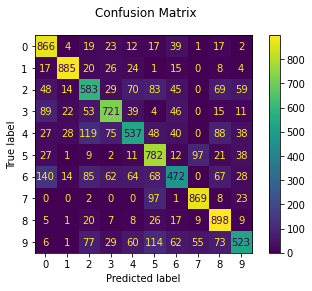

In [87]:
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [20]:
import pandas as pd
from random import randrange
result_df = pd.DataFrame(columns = ['No_of_points', 'Time_TSNE', 'Accuracy'])
print(result_df)

Empty DataFrame
Columns: [No_of_points, Time_TSNE, Accuracy]
Index: []


In [37]:
for i in range(500):
    if i % 100 == 0:
        print(i)
    number_of_points = i+1
    # print(randrange(10000))
    time_start = time.time()    
    classifier.fit(X_tr_2d, y_train)
    y_pred = classifier.predict(X_ts_2d)
    time_end = time.time()-time_start
    result2 = accuracy_score(y_test[0:number_of_points],y_pred)
    result_df = result_df.append({'No_of_points' : number_of_points, 'Time' : time_end, 'Accuracy': result2}, 
                ignore_index = True)

0
100
200
300
400


In [42]:
df_filter = result_df[result_df['Accuracy'] < 1]

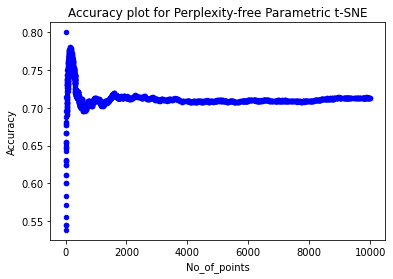

In [43]:
# scatter plot
df_filter.plot(kind = 'scatter',
        x = 'No_of_points',
        y = 'Accuracy',
        color = 'blue')
  
# set the title
plt.title('Accuracy plot for Perplexity-free Parametric t-SNE')
  
# show the plot
plt.show()